In [11]:
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import welch

from lpc.utils import *
from examples.utils import butter_lowpass_filter, plot_audio

We first record some 3 seconds of Polish 'a' vowel and 'sz' consonant. They are recorded with sample rate of 8kHz and then lowpass-filtered with cutoff frequency of 3.5kHz, because that's what (I've read somewhere?) standard speech coding systems used. 

Then we plot obtained signal in both time and frequency domains. Same procedure  used to record other sounds as well. 

In [15]:
audio_dir = os.path.join('.', '..', 'audio')
fs = 8000
f_min = 0
f_max = 3500

a_path = os.path.join(audio_dir, 'a.wav')
sz_path = os.path.join(audio_dir, 'sz.wav')
if not os.path.exists(sz_path):
    a_audio = record_audio(3, sample_rate=fs)
    dump_audio(audio, a_path)
    sz_audio = record_audio(3, sample_rate=fs)
    dump_audio(audio, sz_path)
else:
    a_audio = get_audio(a_path)
    sz_audio = get_audio(sz_path)

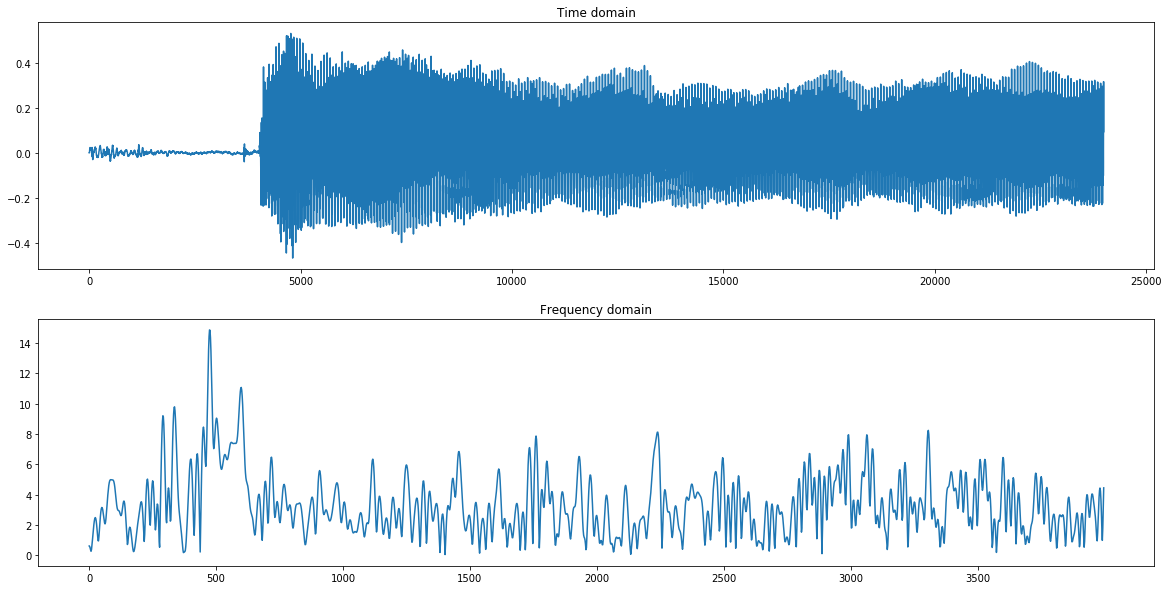

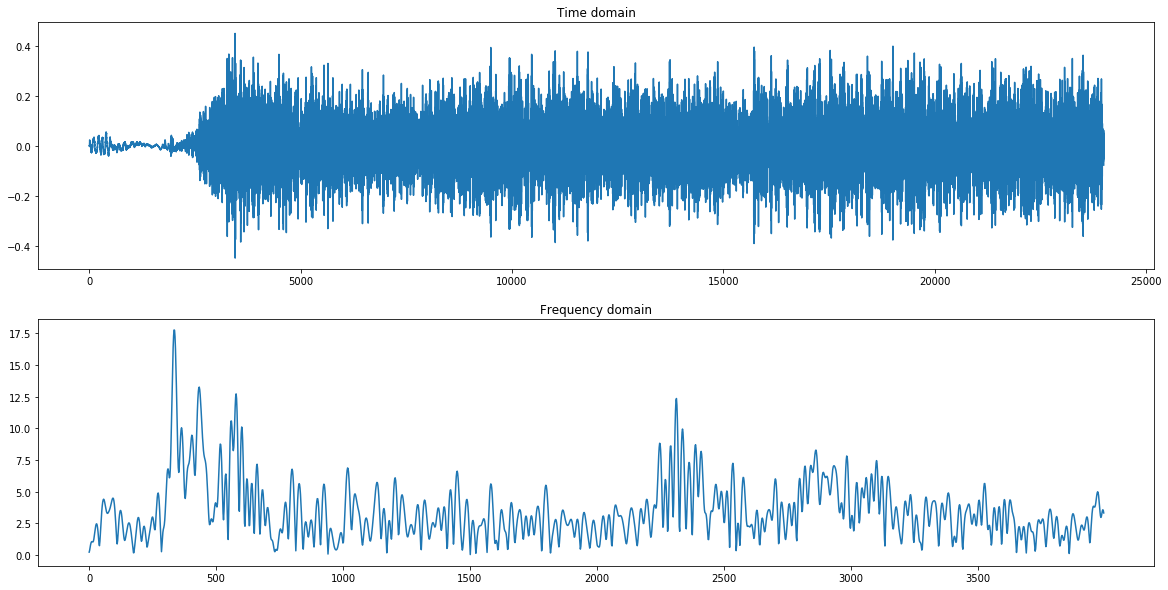

In [16]:
a_left, sz_left = a_audio[:, 0], sz_audio[:, 0]

cutoff_freq = f_max
a_left_lp = butter_lowpass_filter(a_left, cutoff_freq, sample_rate=fs)
sz_left_lp = butter_lowpass_filter(sz_left, cutoff_freq, sample_rate=fs)
    
plot_audio(a_left_lp)
plot_audio(sz_left_lp)

Let's also try out Welch power spectral density estimate which should be less noisy.

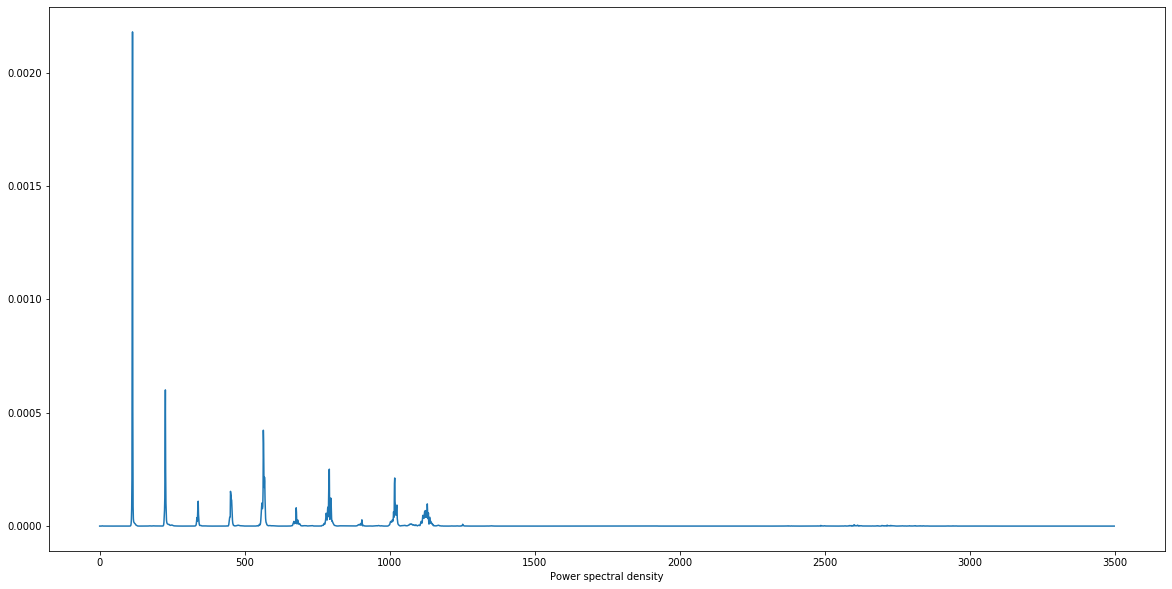

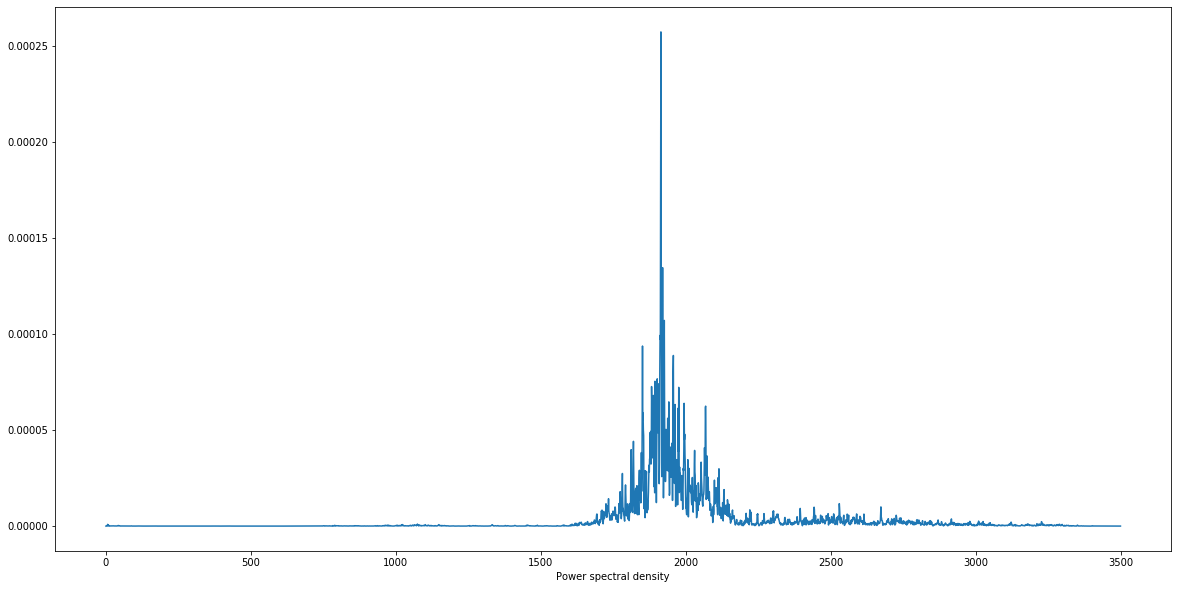

In [17]:
def plot_welch(data, sample_rate=fs):
    plt.figure(figsize=(20, 10))
    f, Pxx_den = welch(data, fs=sample_rate, nperseg=8192)
    welch_min = int(2 * f_min / fs * len(f))
    welch_max = int(2 * f_max / fs * len(f))
    plt.plot(f[welch_min:welch_max], Pxx_den[welch_min:welch_max])
    plt.xlabel('Power spectral density')
    

plot_welch(a_left_lp)
plot_welch(sz_left_lp)

Niiice. 'a' is a voiced sound and frequency peaks (i.e. *formants*) are clearly visible. 'sz' is unvoiced on the other hand and the spectrum looks like it. We can see noisiness of the characteristic on higher frequencies.